In [1]:
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import healpy as hp
from astropy.coordinates import spherical_to_cartesian
import numpy as np
import scipy
from astropy.cosmology import WMAP9
from astropy.table import Table
from astroquery.vizier import Vizier
import astropy.units as u
import astropy.constants as c
from scipy.special import gammaincinv
import pickle
from ligo.skymap.io import read_sky_map
from ligo.skymap.postprocess import crossmatch
from sky_tiling import galaxy_informed_tiling, ranked_tiling

/Users/kruthik/opt/miniconda3/envs/ghosh_sky_tiling/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
pd.read_csv("results/bayestar_new_time_gal_informed/bns_50Mpc_Roman_gal_informed_schedule.csv")

,Observation_Time,Tile_Index,RA,Dec,tile_prob,tile_Mstar,tile_Mstar*tile_prob,Slew Angle (deg),Air_Mass,Lunar-tile,Lunar-tile separation (deg),Lunar separation (deg),Lunar_Illumination,Lunar_altitude
0,2023-11-15 02:12:14,108398,270.102599,28.000508,0.000873,8.176485e+12,7.138156e+09,0.000000,1.588960,41523,55.416633,55.698556,0.033919,-6.568041
1,2023-11-15 02:13:04,120274,273.822059,39.112664,0.002500,6.032210e+12,1.508193e+10,0.529335,1.415599,41523,55.906840,56.186997,0.033942,-6.716574
2,2023-11-15 02:13:54,122349,273.364275,41.229265,0.001513,4.477489e+12,6.772625e+09,0.529149,1.419036,41523,56.121292,56.399660,0.033965,-6.865235
3,2023-11-15 02:14:44,122348,272.660691,41.229265,0.002136,4.477489e+12,9.564996e+09,1.500924,1.436227,41523,56.050346,56.327261,0.033988,-7.014025
4,2023-11-15 02:15:34,109599,273.939814,29.058809,0.002244,3.598651e+12,8.076135e+09,0.529150,1.499030,41523,56.255377,56.530570,0.034010,-7.162942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,2023-11-18 02:18:54,112527,272.893755,31.704560,0.005890,1.395104e+11,8.217106e+08,1.529945,1.595723,40990,72.796394,72.655246,0.245883,19.767666
273,2023-11-18 02:19:44,117037,270.388579,35.937762,0.004686,1.387143e+11,6.499878e+08,0.529148,1.625016,40990,72.583255,72.443322,0.245939,19.671529
274,2023-11-18 02:20:34,114811,272.173395,33.821161,0.009701,6.791614e+10,6.588613e+08,0.529148,1.603741,40990,72.375484,72.236636,0.245996,19.575006
275,2023-11-18 02:21:24,115372,271.530792,34.350312,0.007783,6.726695e+10,5.235252e+08,0.977335,1.621809,40990,73.186146,73.048657,0.246052,19.478099


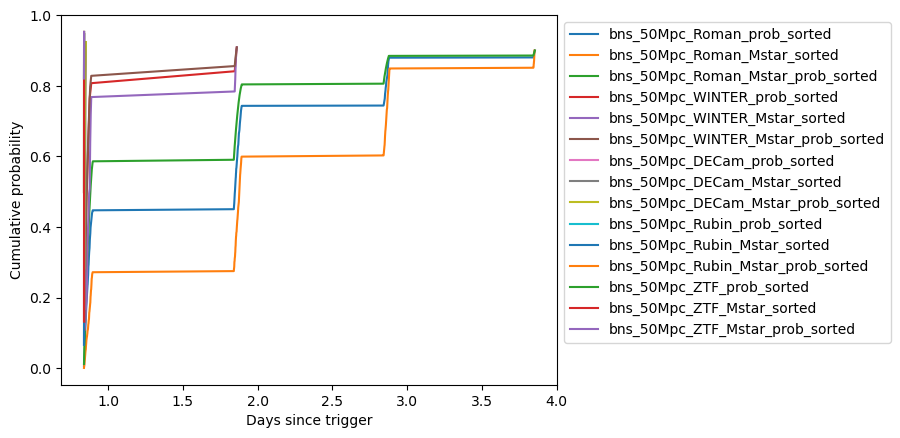

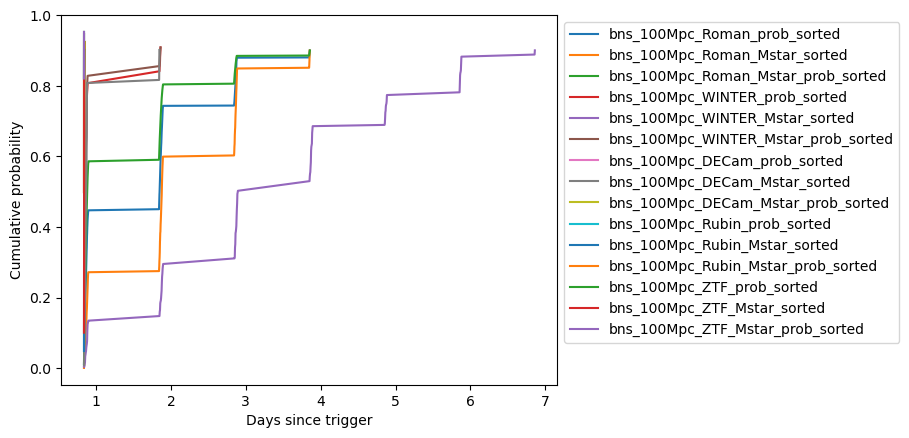

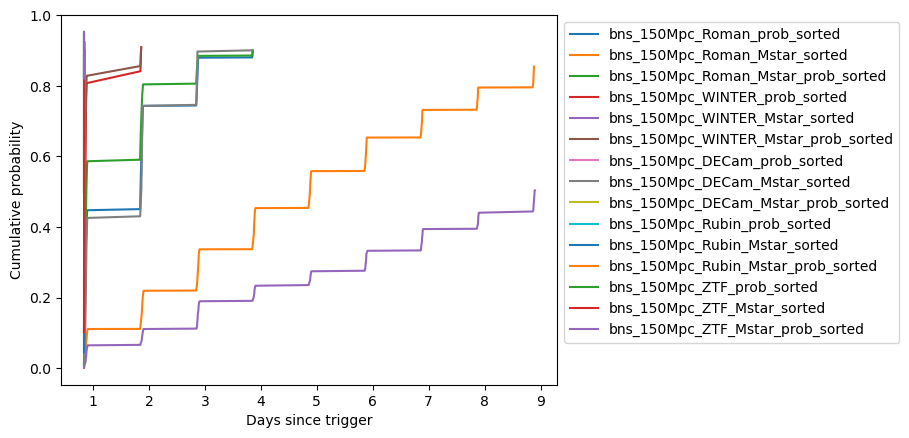

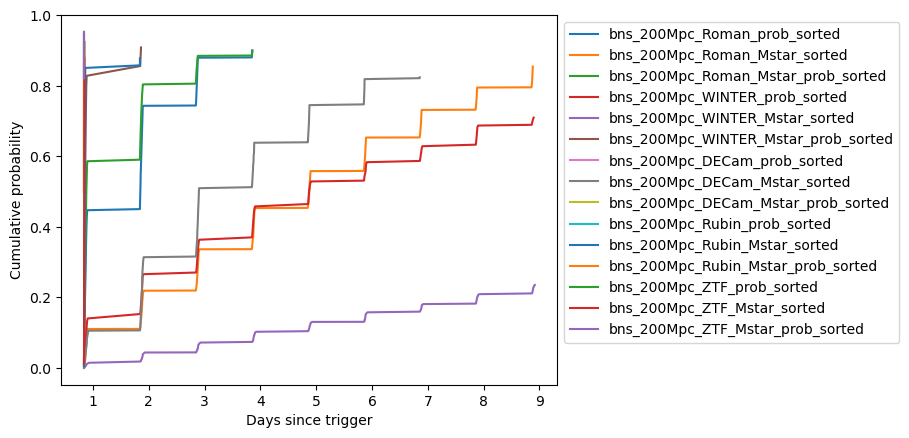

In [18]:
from astropy.time import Time

ra = -87.85234195489255
dec = 35.308376046435775
inj_trigger_gps = 1383977402

inj_list = ["bns_50Mpc", "bns_100Mpc", "bns_150Mpc", "bns_200Mpc"]
site_names = ["Roman", "WINTER", "DECam", "Rubin", "ZTF"]

schedules = {"prob_sorted":"gal_informed_mstar_prob_schedule.csv", "Mstar_sorted":"gal_informed_schedule.csv", "Mstar_prob_sorted":"prob_ranked_schedule.csv"}

for inj_name in inj_list:
    for telescope in site_names:
        for key in schedules.keys():
            tag = inj_name+"_"+telescope
            schedule_file = "results/bayestar_new_time_gal_informed/"+tag+"_"+schedules[key]
            df_schedule = pd.read_csv(schedule_file, header=0)
            df_schedule["Observation_Time"] = pd.to_datetime(df_schedule["Observation_Time"])
            astropy_times = (Time(df_schedule["Observation_Time"]).gps -  inj_trigger_gps)*u.s
            dt_days =  astropy_times.to(u.sday)
            plt.plot(dt_days, df_schedule["tile_prob"].cumsum(), label=tag+"_"+key)
            plt.xlabel("Days since trigger")
            plt.ylabel("Cumulative probability")

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()